Text(0.5, 1.0, 'Adaptive Gaussian + median_filtered_image')

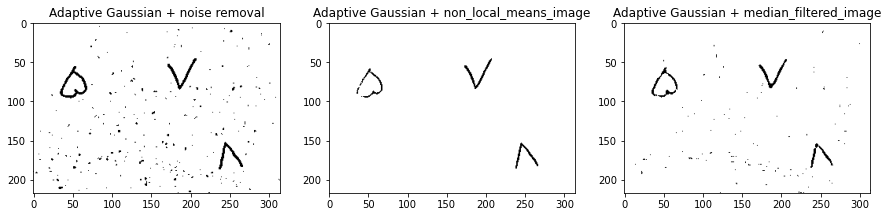

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load our new image
original_image = cv2.imread('adad.jpg', 0)

# Noise removal with Gaussian blur
noise_removed_image = cv2.GaussianBlur(original_image, (5, 5), 0)

non_local_means_image = cv2.fastNlMeansDenoising(original_image, None, 30, 7, 21)

median_filtered_image = cv2.medianBlur(original_image, 5)

# Apply adaptive thresholding with Gaussian blur to the original image
output1 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
output2 = cv2.adaptiveThreshold(non_local_means_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
output3 = cv2.adaptiveThreshold(median_filtered_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=[15,15])
plt.subplot(131); plt.imshow(output1, cmap='gray'); plt.title("Adaptive Gaussian + noise removal")
plt.subplot(132); plt.imshow(output2, cmap='gray'); plt.title("Adaptive Gaussian + non_local_means_image") # more sophisticated comparing all patches in the image and averaging similar ones
plt.subplot(133); plt.imshow(output3, cmap='gray'); plt.title("Adaptive Gaussian + median_filtered_image") #salt & pepper removal

Text(0.5, 1.0, 'Binary image3')

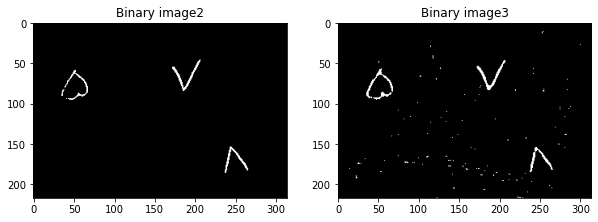

In [3]:
_, inverted_img2 = cv2.threshold(output2 ,127,255,cv2.THRESH_BINARY_INV)
_, inverted_img3 = cv2.threshold(output3 ,127,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(inverted_img2, cmap='gray');plt.title("Binary image2")
plt.subplot(122);plt.imshow(inverted_img3, cmap='gray');plt.title("Binary image3")

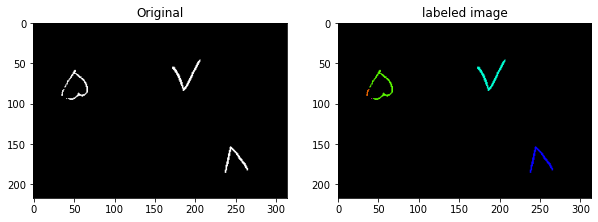

In [4]:
_, inverted_img2 = cv2.threshold(inverted_img2, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(inverted_img2)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(inverted_img2) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(inverted_img2, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");

In [5]:
# Assuming 'labels' is the label map obtained from connected components analysis

# (excluding the background label 0)
num_labels = len(np.unique(labels)) - 1

print(f"Total connected components found: {num_labels}")

Total connected components found: 5


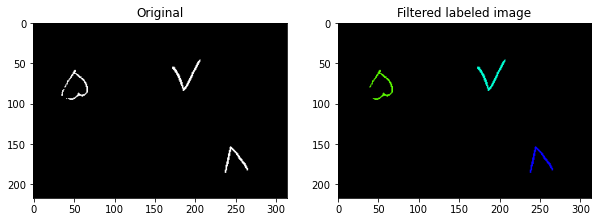

In [7]:
# Filter out small components based on area
min_area_threshold = 10

# Iterate over each component and filter based on area
for label in range(1, num_labels):
    component_area = np.sum(labels == label)
    if component_area < min_area_threshold:
        labels[labels == label] = 0  # Set small components to background

# Update the labeled image after filtering
label_hue_filtered = np.uint8(179 * labels / np.max(labels))
blank_filtered = np.ones_like(inverted_img2) * 255
labeled_img_filtered = cv2.merge([label_hue_filtered, blank_filtered, blank_filtered])

# Convert the filtered labeled image to BGR
labeled_img_filtered = cv2.cvtColor(labeled_img_filtered, cv2.COLOR_HSV2BGR)

# Set background label to black
labeled_img_filtered[label_hue_filtered == 0] = 0

# Display the filtered labeled image
plt.figure(figsize=[10, 8])
plt.subplot(121); plt.imshow(inverted_img2, cmap='gray'); plt.title("Original")
plt.subplot(122); plt.imshow(labeled_img_filtered, cmap='gray'); plt.title("Filtered labeled image")
plt.show()

In [8]:
num_labels = len(np.unique(labels)) - 1

print(f"Total connected components found: {num_labels}")

Total connected components found: 3
